In [1]:
import json

from PIL import Image

from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model

device = 'cpu'

som_model = get_yolo_model(model_path='weights/icon_detect/best.pt')
som_model.to(device)
print('model to {}'.format(device))

[2024-11-13 11:27:31,915] [ WARNING] easyocr.py:80 - Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


model to cpu


In [2]:
# two choices for caption model: fine-tuned blip2 or florence2

# caption_model_processor_blip2 = get_caption_model_processor(model_name="blip2", model_name_or_path="./weights/icon_caption_blip2", device=device)
caption_model_processor_florence = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)

Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


In [3]:
som_model.device, type(som_model) 

(device(type='cpu'), ultralytics.models.yolo.model.YOLO)

In [5]:
cnt = 0
image_path = 'imgs/google_page.png'
# image_path = 'imgs/windows_home.png'
# image_path = 'imgs/suqi2.png'
draw_bbox_config = {
    'text_scale': 0.8,
    'text_thickness': 2,
    'text_padding': 3,
    'thickness': 3,
}
BOX_TRESHOLD = 0.03

image = Image.open(image_path)
image_rgb = image.convert('RGB')

ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.9}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=False, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor_florence, ocr_text=text,use_local_semantics=True, iou_threshold=0.1)


image 1/1 E:\OmniParser\imgs\google_page.png: 448x640 100 0s, 138.3ms
Speed: 15.7ms preprocess, 138.3ms inference, 1.0ms postprocess per image at shape (1, 3, 448, 640)


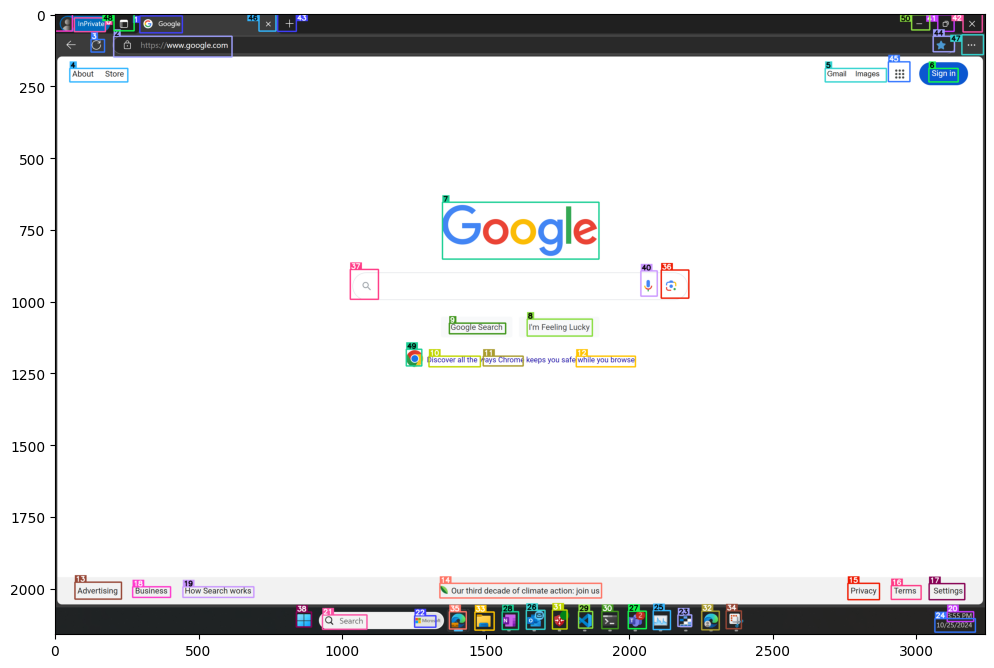

In [6]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(12,12))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('on')
plt.imshow(image)


In [7]:
# print(label_coordinates)
parsed_content_list
jsonStr = json.dumps(parsed_content_list)
print(jsonStr)

["Text Box ID 0: InPrivate", "Text Box ID 1: G Google", "Text Box ID 2:  http://www.google.com", "Text Box ID 3: C", "Text Box ID 4: About   Store", "Text Box ID 5: Gmail  Images ", "Text Box ID 6:  Sign in ", "Text Box ID 7: Google", "Text Box ID 8: I'm Feeling Lucky ", "Text Box ID 9: Google Search ", "Text Box ID 10: Discover all the ", "Text Box ID 11: /aysChrome", "Text Box ID 12: while you browse", "Text Box ID 13:  Advertising ", "Text Box ID 14:  Our third decade of climate action: join us", "Text Box ID 15: Privacy ", "Text Box ID 16: Terms", "Text Box ID 17:  Setings ", "Text Box ID 18:  Business ", "Text Box ID 19: How Search works ", "Text Box ID 20: 3:55PM", "Text Box ID 21: Q  Search ", "Text Box ID 22: Micros", "Text Box ID 23: 3", "Text Box ID 24: 10/25/2024", "Icon Box ID 25: Image", "Icon Box ID 26: Microsoft Outlook.", "Icon Box ID 27: Teams.", "Icon Box ID 28: Microsoft OneNote.", "Icon Box ID 29: Email or messaging application.", "Icon Box ID 30: Undo", "Icon Box I

In [8]:
import numpy as np

# x-axis, y-axis, width, height
label_coordinates
label_coordinates_serializable = {k: v.tolist() if isinstance(v, np.ndarray) else v for k, v in label_coordinates.items()}
jsonStr = json.dumps(label_coordinates_serializable)
print(jsonStr)

{"0": [67.00000762939453, 13.000003814697266, 107.99999237060547, 48.0], "1": [295.0, 6.0, 148.0, 59.0], "2": [204.00001525878906, 77.0, 412.0, 72.0], "3": [125.0, 88.0, 47.0, 44.0], "4": [51.00001525878906, 189.0, 202.0, 47.0], "5": [2682.0, 189.0, 213.0, 47.0], "6": [3043.0, 189.0, 102.0, 47.0], "7": [1349.0001220703125, 655.0000610351562, 545.0, 198.0], "8": [1644.0, 1062.0, 227.0, 59.0], "9": [1373.0, 1076.0, 196.0, 37.0], "10": [1302.0001220703125, 1191.0, 179.0, 37.0], "11": [1491.0, 1191.0, 139.0, 34.0], "12": [1815.0, 1191.0, 206.0, 37.0], "13": [69.0, 1978.9998779296875, 162.0, 59.0], "14": [1340.0001220703125, 1982.9998779296875, 563.0, 51.0], "15": [2761.999755859375, 1982.0, 110.0, 57.0], "16": [2912.0, 1990.0, 104.0, 48.0], "17": [3044.999755859375, 1983.0, 124.0, 56.0], "18": [270.0, 1994.0, 132.0, 37.0], "19": [445.0, 1994.0, 247.0, 37.0], "20": [3107.000244140625, 2081.0, 92.0, 34.0], "21": [931.0000610351562, 2092.0, 154.99993896484375, 50.0], "22": [1252.0, 2095.0, 74